### This Jupyter Notebook shows how to load the Twitter data into a dataframe

Useful links

* Introduction to Jupyter Notebooks: [Jupyter Notebook Tutorial: Introduction, Setup, and Walkthrough](https://www.youtube.com/watch?v=HW29067qVWk)
* Getting started with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html
* Getting started with natural language processing (NLP) with NLTK https://www.nltk.org/book/

In [1]:
import os
import json
import re
import nltk
import numpy as np
import pandas as pd
import random
from collections import Counter
from nltk.stem.porter import PorterStemmer
from pprint import pprint
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.text import Text
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.text import Text
from wordcloud import WordCloud
from nltk.util import ngrams
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Brands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Search terms for the corpus: 
Fake news
Propaganda
Disinformation
Active measures
Subversion
Interference
Influence
Conspiracy
Deep state
Misinformation
Fabrication
Manipulate
Deceive
Useful idiots
Mainstream media
Populism
Untrustworthy
Hoax
Made-up
Bogus
Inaccurate
Doctored
Fact Checking
eu False
eu Fraud
eu Hoax
eu Lies
eu Rumours
eu Troll
europe False
europe Fraud
europe Hoax
europe Lies
europe Rumours
europe Troll
european False
european Fraud
european Hoax
european Lies
european Rumours
european Troll 

In [2]:
df = pd.read_pickle(r"C:\Users\Brands\Documents\Cardiff\Dissertation work\Data_analysis\Data\June_2020\climate_df_June20.pkl")

In [7]:
df.head(100)

,tweet_id,hashtags,tweet_text,is_reply,is_retweet,user_name,created
5491,1267599984108564481,[],"there is only one dhs, and the trump administration currently runs it. but this warning about white supremacist agitation will still be categorized as misinformation by those who need there to a singular enemy as we cultivate a climate of fear.",None,False,BryanMyrick,Mon Jun 01 23:32:41 +0000 2020
6493,1267599656751706113,[],"what exactly is the https://t.co/vh60pdlgsn group @markronchettinm is associated with? climate change, ban on fracking and support of the green new steal, for starters. and ronchetti wanted to sneak climate change hoax into his weather broadcasts? wow! \nhttps://t.co/imxpociozz https://t.co/tca23somaf",None,False,NGirrard,Mon Jun 01 23:31:23 +0000 2020
7770,1267599245734903808,[],"rt @michaelemann: ""tony heller (pseudonym steven goddard) doesn’t just believe climate change is a “fraud” and a “scam”, but has promoted c…",None,False,KellyTurberfie1,Mon Jun 01 23:29:45 +0000 2020
9896,1267598569558568960,[],@simonahac @qanda that @qanda debate set us back another 20 years. thanks @abctv 😡 please don't invite @mattjcan on tv again. you've allowed him to spread misinformation yet again. there are reliable alternatives to #fossilfuels - own it!\n#climateaction #auspol,simonahac,False,BygoneDiva,Mon Jun 01 23:27:04 +0000 2020
12466,1267591788879020032,[],@rln_nelson @mattp1949 @smarzeli @chimera414 @glenncarr6 @michael_d_crow @szomb @eachus @nikolovscience @3ghtweets @ethonraptor @sarenc @climatepoet @d_e_mol @roger_clague @surfing_yeti @eugenesurratt @andrygiles @electricelecti1 @dawntj90 @pocolitto @truthjr4 @swcrisis @daveirving99 @njbtweet @ike_kiefer @cymaticwave @stormsignalsa @reddragonfly19 @regimechangebc @lindsayyules @mishasmaster2 @chuzbucket @plagueofprogs @albertagrl @gillesnfio @lhougland53 @jjcrosstrainers @mark_melbin @altus_arc @joe_public2018 @johndowney @etterwerner @janick_klossner @dvibrationz @majesticbanana @veronicatalbot9 @tony__heller @lynnfynn3 this is how you track temperature trends:\n\nhttps://t.co/rqoxcqk92i\n\nnot by subsidizing liberal universities to do it. make them take the @nasa logos off their propaganda.,UvMeter,False,UvMeter,Mon Jun 01 23:00:07 +0000 2020
13798,1267591315719479297,"[CarbonEmissions, GlobalWarming]",gas is a fossil fuel. it produces #carbonemissions and worsens #globalwarming. it’s mining devastates water resources. producing #hydrogengas from #solar is a #zeroemission fuel and our best hope. #transitionfuel is mining industry misinformation. #auspol https://t.co/g0zjfjirwp,None,False,ijenkins99,Mon Jun 01 22:58:15 +0000 2020
16846,1267590259426107393,[],"@tyotoriffle @ibergwiesel @fcmfcs2019 @dawntj90 @fauntleroy1934 @stormsignalsa @narvuntien @ecosensenow @medbennett @thinks_about_it @roypentland @jamz129 @tqmka @over400ppm @bubbasranch @rijpew @cjtjgeol @slugbub @gavinkreijkes @climatehope2 @austbondlover @barbarajdurkin @poynton_j @geraldkutney @mtnman0038 @no2wind @documentavi @richard25972121 @reckedrik @bridgetholmstro @free_wales @bkzork @scaramangi @cup_high @alamerqld @csfc67 @edsmith288 @drwaheeduddin @jwspry @paprikalady @geoff4273 @bergeonline @mccaffreydanie1 @dbirch214 @hifiwhiphi @damo__73_ @outsidersonsky @jaggermickoz @steve_holyoake @beefyfarmer that's all you care about though. you want to drown out any real discussion and inject your personal attacks, propaganda, and lies. https://t.co/glqoeoys7l",TyotoRiffle,False,DougGra79750897,Mon Jun 01 22:54:03 +0000 2020
21644,1267588554173145090,[],"@amandacarpenter never had any hope for trump. he has always been a conspiracy theorist who attacks law enforcement. he called the fbi ""scumbags"". so why should we respect law enforcement when it controlled by the ""deepstate""? he (along infowars etc) have helped create this climate of chaos.",amandacarpenter,False,mangledworld,Mon Jun 01 22:47:16 +0000 2020
23635,1267587859575377923,[],"@douggra79750897 @tyotoriffle @fcmfcs2019 @dawntj90 @fauntlero

# Number of tweets

In [8]:
print(f"{len(df)} texts loaded.")

54078 texts loaded.


In [5]:
hashtags = []
for tag in df.hashtags:
    if tag != []:
        hashtags.extend(tag)
        

counts = Counter(hashtags)
pprint(counts)

Counter({'ClimateChange': 580,
         'ClimateCrisis': 322,
         'ClimateScam': 305,
         'populism': 293,
         'GretaThunberg': 207,
         'climatebrawl': 202,
         'climatechange': 179,
         'climate': 161,
         'coronavirus': 148,
         'climatedenial': 137,
         'misinformation': 135,
         'COVID19': 103,
         'ClimateChangeHoax': 91,
         'disinformation': 74,
         'FakeNews': 61,
         'populist': 59,
         'ClimateChangePolicy': 59,
         'China': 57,
         'Antifa': 51,
         'environment': 49,
         'WorldEnvironmentDay': 48,
         'ClimateHoax': 39,
         'denier': 36,
         'fossilfuel': 35,
         'information': 35,
         'USA': 32,
         'ClimateAction': 31,
         'auspol': 31,
         'conspiracy': 31,
         'globalwarming': 30,
         'WWG1WGA': 30,
         'climatechangehoax': 30,
         'NWO': 29,
         'Brazil': 28,
         'massvaccinations': 28,
         'ClimateFr

In [6]:
for tag in counts:
    if 'climate' in tag.lower():
        print(tag)    
    elif 'earth' in tag.lower():
        print(tag)
    elif 'globe'in tag.lower():
        print(tag)
    elif 'global' in tag.lower():
        print(tag)

GlobalWarming
ClimateChange
ClimateCrisis
ClimateJustice
ClimateScam
climatechange
ClimateAction
climate
climatebrawl
ClimateFraud
ClimateHoax
ClimateEmergency
ClimateChangeHoax
globalwarming
ClimateFriday
Climatechange
ClimateStriketaking
GlobalistFascistSocialistTyranny
climatedenial
climatechangehoax
ActOnClimate
globalcooling
climatedeniers
globalwarmingcult
Climate
ClimateChangePolicy
Global
climatejustice
ClimateReality
ExposeGlobalWarmingHoax
climatescam
ClimateCreationScience
ClimateDeniers
Climatefool
ClimateChangeLawsuit
ClimateClowns
Climate_is_Changing
ClimateDenial
globalwarmingisalie
ClimateScience
climateaction


In [7]:
# for index, row in df.iterrows():
#     if '#climatecrisis' in row.tweet_text:
#         print(row.tweet_text)

# Top users

In [8]:
df.user_name.value_counts()

IBergwiesel        355
TyotoRiffle        334
Narvuntien         307
hassciencebot      274
fcmfcs2019         204
OscarsWild1        166
AtomsksSanakan     139
FakeTrumpBot1      138
JoeTheAtheist      135
AJamesW2           123
Fauntleroy1934     123
RagingPatriot_     112
ritchie97064420    104
cjtjgeol           104
FeynmanFreaky      101
BubbasRanch         90
Cryptocraziac       90
johnfocook          85
GeraldKutney        80
Ceist8              77
climate_fact        72
DigbyKale           67
nonewsagwdenial     65
ClimatePatriot      63
Bat_Yann            61
Schrdin79008382     60
DonnachadhMc        60
DigDougFTW          59
EthicalRenewal      59
Zulianello_M        58
ladyspat1           58
geoffmprice         57
karenwatson53       57
TinTincognito       56
AOECOIN             55
biobaby19           54
TheDisproof         54
insane_voice        53
RoyPentland         52
PhilosophySeel      51
thinks_about_it     49
DougGra79750897     48
KellyTurberfie1     46
ronaldgrf  

# Searching in tweets

# Replies in climate

In [9]:
replies = df.is_reply.notnull().sum()
percent_reply = round(replies / len(df), 2)
percent_reply
print(len(df) - replies)
df.is_reply.notnull().sum()

36536


17542

In [10]:
# 0.42% of the tweets were climate tweets from callout dataset
round(301_631/136_265_329 * 100,2)

0.22

# Unique tweets

In [11]:
climate_set = set(df.tweet_text)
print(len(climate_set), "Unique Tweets")

3723 Unique Tweets


# Bag of words: Climate change

In [3]:
normalizer = WordNetLemmatizer()

def get_part_of_speech(word):
    probable_part_of_speech = wordnet.synsets(word)
    pos_counts = Counter()
    pos_counts["n"] = len(  [ item for item in probable_part_of_speech if item.pos()=="n"]  )
    pos_counts["v"] = len(  [ item for item in probable_part_of_speech if item.pos()=="v"]  )
    pos_counts["a"] = len(  [ item for item in probable_part_of_speech if item.pos()=="a"]  )
    pos_counts["r"] = len(  [ item for item in probable_part_of_speech if item.pos()=="r"]  )
    most_likely_part_of_speech = pos_counts.most_common(1)[0][0]
    return most_likely_part_of_speech

def preprocess_text(text):
    cleaned = re.sub(r'\W+', ' ', text).lower()
    tokenized = word_tokenize(cleaned)
    normalized = " ".join([normalizer.lemmatize(token, get_part_of_speech(token)) for token in tokenized])
    return normalized


In [4]:
ps = PorterStemmer()
tweets = df.tweet_text


#adding personal stopwords for this dataset
stop_words = stopwords.words('english')
newStopWords = ['RT','I','T','S','U','http','co','s','n','u','p','amp','rt']
stop_words.extend(newStopWords)

# join the list to preprocess
climate_strings = ' '.join(tweets)

# Removing usernames
climate_strings = re.sub(r'@([A-Za-z0-9_]+)','', climate_strings)

climate_split = climate_strings.split(" ")
climate_split = [word for word in climate_split if not word in stop_words]
print(climate_split[0:10])

['one', 'dhs,', 'trump', 'administration', 'currently', 'runs', 'it.', 'warning', 'white', 'supremacist']


In [11]:
climate_split = [word for word in climate_split if not word in stop_words]

In [12]:
print(climate_split[0:10])

['one', 'dhs,', 'trump', 'administration', 'currently', 'runs', 'it.', 'warning', 'white', 'supremacist']


In [10]:
processed_climate = preprocess_text(" ".join(climate_split))


processed_climate = [word for word in processed_climate.split(" ") if not word in stop_words]

bow_climate = Counter(processed_climate)

In [11]:
pprint(bow_climate.most_common(20))

[('climate', 41242),
 ('propaganda', 28564),
 ('call', 12189),
 ('year', 12004),
 ('political', 11565),
 ('child', 11078),
 ('old', 10921),
 ('brainwash', 10823),
 ('plan', 10811),
 ('leftist', 10772),
 ('abuse', 10749),
 ('c', 10673),
 ('nj', 10573),
 ('five', 10572),
 ('traumatize', 10549),
 ('change', 10532),
 ('conspiracy', 8703),
 ('use', 7638),
 ('need', 6875),
 ('chinese', 5915)]


# WordCloud

In [18]:
# wordcloud = WordCloud(width = 1000, height = 500,).generate(" ".join(processed_climate))
# wordcloud.to_file("word_cloud_June_20.png")

# Count retweets

In [19]:
# Count retweets

retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        retweets.append(retweet)
        

print(len(retweets))

28414


# Ngrams: Climate

In [20]:
# print(processed_climate)

In [39]:
n = 1

unigrams = ngrams(processed_climate, n)

ngrams_climate = Counter(unigrams)
ngrams_climate.most_common(10)


[(('climate',), 41242),
 (('propaganda',), 28564),
 (('call',), 12189),
 (('year',), 12004),
 (('political',), 11565),
 (('child',), 11078),
 (('old',), 10921),
 (('brainwash',), 10823),
 (('plan',), 10811),
 (('leftist',), 10772)]

# Hashtag co-occurence


In [13]:
regex = r"(?<!RT\s)#\w+"

hashtag_list = []
for index, row in df.iterrows():
        htags = re.findall(regex, row.tweet_text.lower())
        hashtag_list.append(htags)


In [4]:
hashtag_ref = [i for i in hashtag_list if i != [] and len(i) > 1]
hashtag_ref

[['#fossilfuels', '#climateaction', '#auspol'],
 ['#carbonemissions',
  '#globalwarming',
  '#hydrogengas',
  '#solar',
  '#zeroemission',
  '#transitionfuel',
  '#auspol'],
 ['#climatechange', '#misinformation'],
 ['#climatechange', '#misinformation'],
 ['#climatechange', '#misinformation'],
 ['#climatechange', '#misinformation'],
 ['#climatecrisis', '#bunkerboy'],
 ['#fossilfuel', '#climateemergency'],
 ['#auspol', '#qanda'],
 ['#coronavirus', '#coronavirusuk', '#covidー19', '#covidiots'],
 ['#covid19', '#climatechange'],
 ['#huizengapark', '#fortlauderdale'],
 ['#fossilfuels', '#climateaction', '#auspol'],
 ['#carbonemissions',
  '#globalwarming',
  '#hydrogengas',
  '#solar',
  '#zeroemission',
  '#transitionfuel',
  '#auspol'],
 ['#climatechange', '#misinformation'],
 ['#climatechange', '#misinformation'],
 ['#climatechange', '#misinformation'],
 ['#climatechange', '#misinformation'],
 ['#climatecrisis', '#bunkerboy'],
 ['#fossilfuel', '#climateemergency'],
 ['#auspol', '#qanda'],


In [24]:
# # creating unique list 
# htag_over1 = [x for x in hashtag_list if len(x) > 1]

# uni_htags_1 = set([])

# for x in htag_over1:
#     for y in x:
#         uni_htags_1.add(y)
        
# uni_htags_1 = list(uni_htags_1)
# uni_htags_1

['#us',
 '#gizmodo',
 '#racialjustice',
 '#talkradio',
 '#yuwa4india',
 '#jfkjrlives',
 '#boycott',
 '#bansharia',
 '#newworldorder',
 '#alp',
 '#newworlddisorder',
 '#agenda21',
 '#warming',
 '#minnesota',
 '#voteredtosaveamerica2020',
 '#qarmy',
 '#mobsterpotus',
 '#genocide',
 '#betterfuture',
 '#vote',
 '#wapwanilivesmatter',
 '#airdrie',
 '#trump',
 '#tomcotton',
 '#teamtims',
 '#musk',
 '#news',
 '#climateaction',
 '#un',
 '#chemtrails',
 '#climatechange',
 '#cannabis',
 '#digitalisierung',
 '#muslims',
 '#factcheck',
 '#insights',
 '#climatescience',
 '#intelizonenergy',
 '#energytransition',
 '#coronavirusuk',
 '#taxfree',
 '#tre45on',
 '#madeinindia',
 '#staystrong',
 '#climatedenialism',
 '#extreme_right',
 '#change',
 '#solarstreetlights',
 '#sdh',
 '#brexit',
 '#unity',
 '#gg',
 '#zwangsbeglückung',
 '#coronapandemic',
 '#climateemergency',
 '#msm',
 '#blacklivesmattters',
 '#hope',
 '#soros',
 '#trumpignorance',
 '#knownews',
 '#pizzagateisreal',
 '#singlemarket',
 '#trans

In [7]:
uni_htags_1 = [
'#gretathunberg', '#populism',
'#climatecrisis', '#gretathunberg',
'#climatecrisis', '#populism',
'#climatechange', '#misinformation',
'#climatebrawl', '#climatechange',
'#climatechange', '#covid19',
'#climatedenial', '#coronavirus',
'#climatechange', '#climatecrisis',
'#climatechange', '#populism',
'#climatechange', '#disinformation',
'#climatebrawl', '#climatecrisis',
'#disinformation', '#misinformation',
'#climatechange', '#propaganda',
'#climatechange', '#environment',
'#climatechange', '#climatechangepolicy',
'#climatechange', '#populist',
'#climatechangepolicy', '#populism',
'#climatechangepolicy', '#populist', 
'#populism', '#populist',
'#climatebrawl', '#disinformation',
'#climatebrawl', '#misinformation',
'#climatechange', '#nor',
'#climatechangepolicy', '#nor',
'#nor', '#populism',
'#nor', '#populist',
'#climatechange', '#conspiracy',
'#climatechangehoax', '#climatecrisis',
'#china', '#worldenvironmentday',
'#climatechange', '#denier',
'#conspiracy', '#denier',
'#climatechange', '#fakenews',
'#climatechange', '#information',
'#covid19', '#usa',
'#actonclimate', '#climatechange',
'#antifa', '#climatechange',
'#climatecrisis', '#climateemergency',
'#climateemergency', '#fossilfuel',
'#climateactionnow', '#populism',
'#blacklivesmatter', '#climatechange',
'#climatechange', '#climatechangeisreal',
'#climateactionnow', '#climatechangeisreal',
'#climateactionnow', '#donaldtrump',
'#climatechangeisreal', '#donaldtrump',
'#climatechangeisreal', '#populism',
'#donaldtrump', '#populism',
'#qanon', '#wwg1wga',
'#coronavirus', '#coronavirusuk',
'#bolsonaro', '#populism',
'#bolsonaro', '#brazil',
'#brazil', '#populism']

uni_htags_1 = list(set(uni_htags_1))
print(uni_htags_1)

['#qanon', '#nor', '#climateactionnow', '#coronavirusuk', '#misinformation', '#climatebrawl', '#covid19', '#conspiracy', '#fakenews', '#brazil', '#bolsonaro', '#worldenvironmentday', '#propaganda', '#climatechangepolicy', '#climatecrisis', '#climatechange', '#gretathunberg', '#climatechangeisreal', '#environment', '#actonclimate', '#populist', '#china', '#usa', '#climateemergency', '#climatechangehoax', '#antifa', '#donaldtrump', '#wwg1wga', '#populism', '#information', '#climatedenial', '#denier', '#fossilfuel', '#blacklivesmatter', '#coronavirus', '#disinformation']


In [8]:
# creating matrix of zeros for co-occurence

matrix1 = np.zeros((len(uni_htags_1), len(uni_htags_1)))

htag_to_id1 = {uni_htags_1[i]:i for i in range(len(uni_htags_1))}

In [9]:
# # filling matrix with data

for _ in hashtag_ref:
        hashtags_id1 = [htag_to_id1[x] for x in _ if x in uni_htags_1]
        for h in hashtags_id1:
            for o in hashtags_id1:
                if h != o:
                    matrix1[h, o] += 1


In [10]:
sns.set(rc={'figure.figsize':(46,36)})
sns.set(font_scale = 3)
heatmap_df2 = pd.DataFrame(data=matrix1, columns=uni_htags_1, index=uni_htags_1)

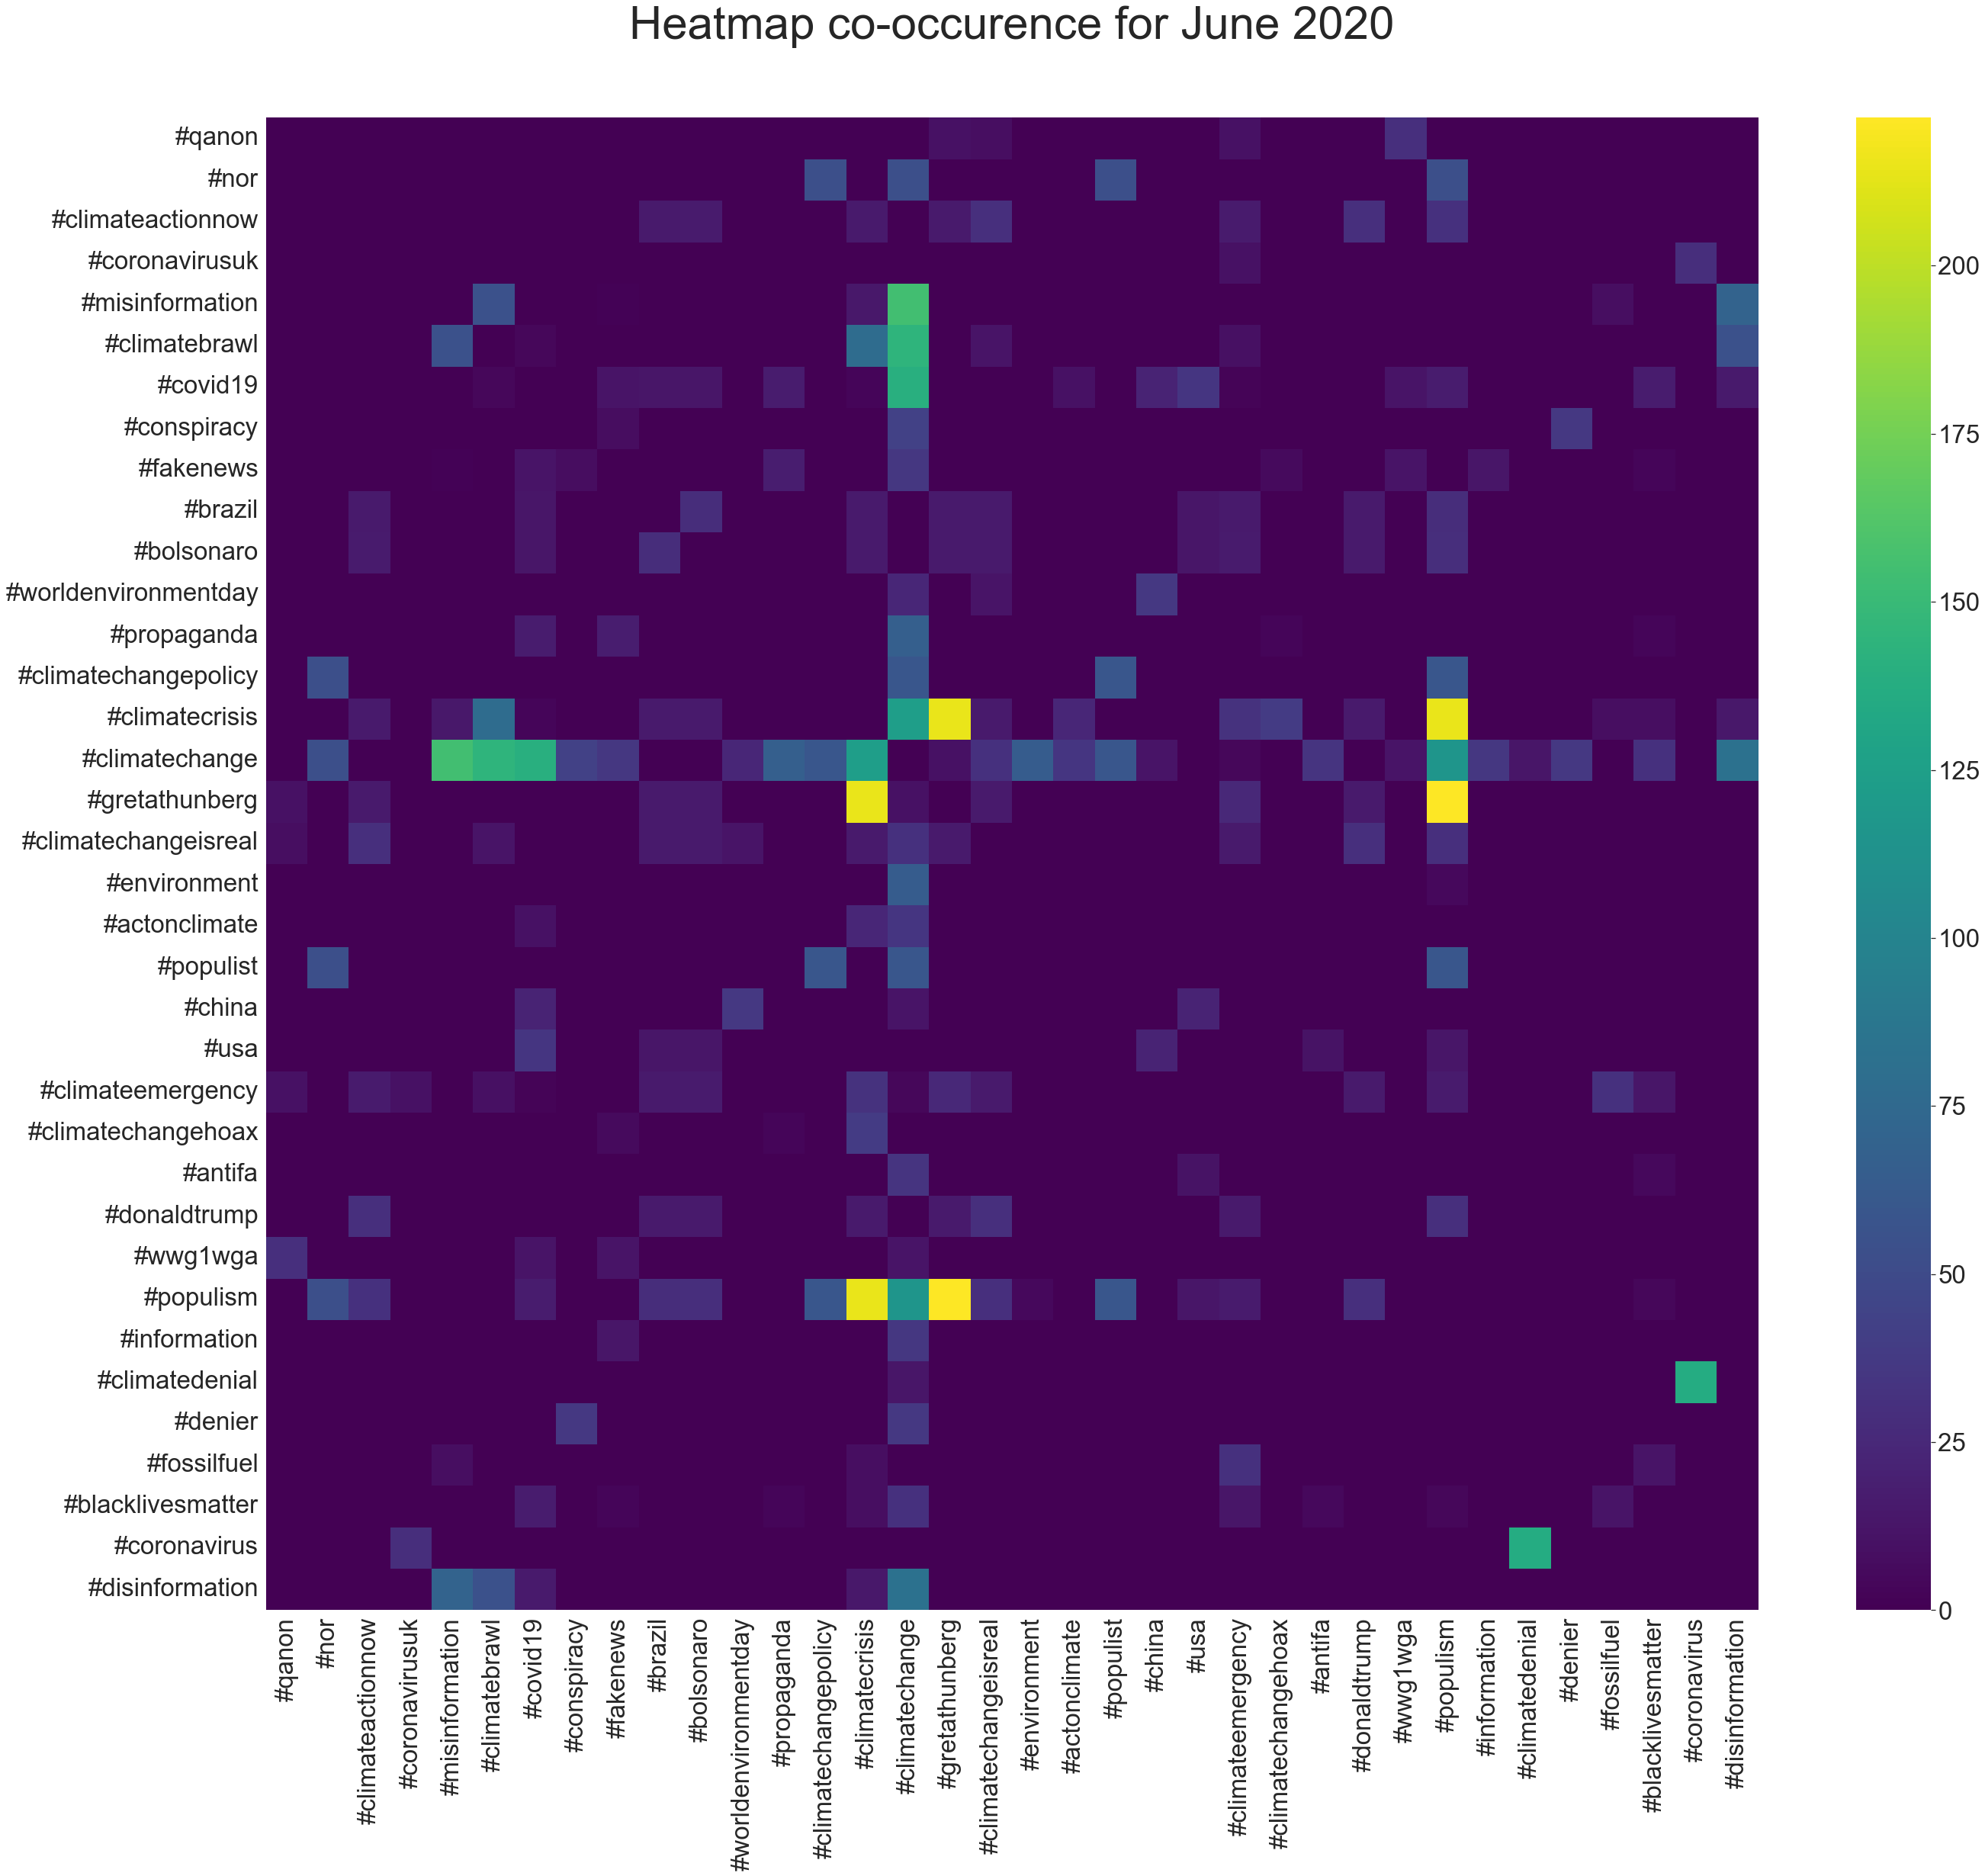

In [11]:
sns.heatmap(heatmap_df2, square=True, cmap='viridis')
plt.title("Heatmap co-occurence for June 2020", fontdict= {'fontsize': 60}, y=1.05)
plt.savefig("htags_climate_June20.png")

In [5]:
counter = Counter()

for tag in hashtag_list:
    tag.sort()
    combos = list(combinations(tag, r=2))
    counter.update(combos)


counter.most_common(50)

[(('#gretathunberg', '#populism'), 222),
 (('#climatecrisis', '#gretathunberg'), 215),
 (('#climatecrisis', '#populism'), 215),
 (('#climatechange', '#misinformation'), 155),
 (('#climatebrawl', '#climatechange'), 144),
 (('#climatechange', '#covid19'), 140),
 (('#climatedenial', '#coronavirus'), 137),
 (('#climatechange', '#climatecrisis'), 124),
 (('#climatechange', '#populism'), 116),
 (('#climatechange', '#disinformation'), 83),
 (('#climatebrawl', '#climatecrisis'), 78),
 (('#disinformation', '#misinformation'), 70),
 (('#climatechange', '#propaganda'), 66),
 (('#climatechange', '#environment'), 64),
 (('#climatechange', '#climatechangepolicy'), 59),
 (('#climatechange', '#populist'), 59),
 (('#climatechangepolicy', '#populism'), 59),
 (('#climatechangepolicy', '#populist'), 59),
 (('#populism', '#populist'), 59),
 (('#climatebrawl', '#disinformation'), 55),
 (('#climatebrawl', '#misinformation'), 55),
 (('#climatechange', '#nor'), 53),
 (('#climatechangepolicy', '#nor'), 53),
 ((

In [29]:
# heatmap_df = pd.DataFrame(data=htag_keys, columns=htag_co, index=htag_co)
# sns.heatmap(heatmap_df, square=False, cmap='viridis')

# Most common hashtags

In [14]:
hashtags_refined = []
for _ in hashtag_list:
    if _ != []:
        hashtags_refined.extend(_)

count_htags = Counter(hashtags_refined)

# uni_htags = list(set(hashtags_refined))
# uni_htags

count_htags.most_common(10)

[('#climatechange', 1334),
 ('#climatecrisis', 549),
 ('#populism', 366),
 ('#climatebrawl', 338),
 ('#covid19', 315),
 ('#climatescam', 313),
 ('#climate', 251),
 ('#gretathunberg', 235),
 ('#misinformation', 211),
 ('#climatebra', 203)]

# Concordance

In [31]:
print(climate_strings[0:10000])

there is only one dhs, and the trump administration currently runs it. but this warning about white supremacist agitation will still be categorized as misinformation by those who need there to a singular enemy as we cultivate a climate of fear. what exactly is the https://t.co/vh60pdlgsn group  is associated with? climate change, ban on fracking and support of the green new steal, for starters. and ronchetti wanted to sneak climate change hoax into his weather broadcasts? wow! 
https://t.co/imxpociozz https://t.co/tca23somaf rt : "tony heller (pseudonym steven goddard) doesn’t just believe climate change is a “fraud” and a “scam”, but has promoted c…   that  debate set us back another 20 years. thanks   😡 please don't invite  on tv again. you've allowed him to spread misinformation yet again. there are reliable alternatives to #fossilfuels - own it!
#climateaction #auspol                                                  this is how you track temperature trends:

https://t.co/rqoxcqk92i

In [5]:
text = Text(climate_strings.split(" "))
concord_climate = text.concordance("traumatize", width=150, lines=50)

Displaying 50 of 10549 matches:
.. did i miss anything? rt : abuse: nj leftists plan to brainwash and traumatize five year old children with political propaganda on so-called "climat
some sort of “dealing”. rt : abuse: nj leftists plan to brainwash and traumatize five year old children with political propaganda on so-called "climat
n so-called "climate c… rt : abuse: nj leftists plan to brainwash and traumatize five year old children with political propaganda on so-called "climat
n so-called "climate c… rt : abuse: nj leftists plan to brainwash and traumatize five year old children with political propaganda on so-called "climat
n so-called "climate c… rt : abuse: nj leftists plan to brainwash and traumatize five year old children with political propaganda on so-called "climat
n so-called "climate c… rt : abuse: nj leftists plan to brainwash and traumatize five year old children with political propaganda on so-called "climat
n so-called "climate c… rt : abuse: nj leftists plan to brainw

In [12]:
for index, row in df.iterrows():
    if "#climatebra" in row.tweet_text:
        print(row.tweet_text)

let's be perfectly clear: 

it is not ok to be a climate denier. 

their propaganda is unethical &amp; threatens the greater good of society &amp; our children's future. challenge their faux-science, use #climatebrawl for help - be active, civil &amp; factual

- #climatechange #climatecrisis
rt @geraldkutney: here are the tweets👇🏻 that started off the friends of #climatebrawl. 

what do we do? we challenge the propaganda of clim…
rt @geraldkutney: here are the tweets👇🏻 that started off the friends of #climatebrawl. 

what do we do? we challenge the propaganda of clim…
rt @geraldkutney: here are the tweets👇🏻 that started off the friends of #climatebrawl. 

what do we do? we challenge the propaganda of clim…
rt @geraldkutney: here are the tweets👇🏻 that started off the friends of #climatebrawl. 

what do we do? we challenge the propaganda of clim…
let's be perfectly clear: 

it is not ok to be a climate denier. 

their propaganda is unethical &amp; threatens the greater good of society &a

the friends of #climatebra…
rt @geraldkutney: what do you call those who troll the trolls (and other climate deniers and their propaganda)?

the friends of #climatebra…
@aanthanurdc @andrewemcameron @jamesrider3 @oscarswild1 @craigthomler @truthstorm17 @zombiepiano @rustyaway @jamz129 @amilitantagnost @feynmanfreaky @fchecker76 @glinch72 @doom37455413 @spurglyd @sart26409389 @ingersolrobert @agtrigor @_42________ @ozwino @electropig @equi_noctis @zerilos @article3s @bitakarma @disorderdipolar @blknwhtkat @janineyve @follz1 @itstheatmospher @dhaessel0 @huntinhippy @karlrobinson02 @desenviron @fantasmavoid @jaisans @bingothagringo @kctaz @insane_voice @charlesdarwintx @piersmorgan @gmb @craigkellymp @murpharoo @zalisteggall "nobody cares about your conspiracy theories" .... correction: leftiewarmsters deny conspiracy theories. but secretly know they're factual. giant cover up of 1970's ice age consensus @gmb @craigkellymp #climatechange #climatebrawl @murpharoo @zalisteggall @peterwsincl

https://t.co/dd33ges71d
is it morally/ethically wrong to: 

lie? - yep

share misinformation? - yep

share propaganda? - yep

insult? - yep

bully? - yep

these are the tools of climate deniers on twitter. challenge them 

join the friends of #climatebrawl - be active, civil &amp; factual
if you think agw is a hoax or the science isn't sound, then here is the reason you have been conned by think tanks who have been paid to create that doubt and misinformation.
this is why agw denial exists https://t.co/cizgcqwqkx

#climatechangeisreal #climatebrawl #climatechange
@paprikalady @roypentland @thedisproof @cjtjgeol @riktheozfrog @johnsmi50968113 @ibergwiesel @tyotoriffle @jamz129 @dardedar @digdougftw @rijpew @drewman_drew @bridgetholmstro @stormsignalsa @narvuntien @climatehope2 @ajamesw2 @over400ppm @tutkija5 @reckedrik @bubbasranch @tqmka @shhsami @fauntleroy1934 @ecosensenow @medbennett @thinks_about_it @slugbub @gavinkreijkes @dawntj90 @austbondlover @barbarajdurkin @poynton_j @gerald

the friends of #climatebra…
rt @geraldkutney: what do you call those who troll the trolls (and other climate deniers and their propaganda)?

the friends of #climatebra…
@aanthanurdc @andrewemcameron @jamesrider3 @oscarswild1 @craigthomler @truthstorm17 @zombiepiano @rustyaway @jamz129 @amilitantagnost @feynmanfreaky @fchecker76 @glinch72 @doom37455413 @spurglyd @sart26409389 @ingersolrobert @agtrigor @_42________ @ozwino @electropig @equi_noctis @zerilos @article3s @bitakarma @disorderdipolar @blknwhtkat @janineyve @follz1 @itstheatmospher @dhaessel0 @huntinhippy @karlrobinson02 @desenviron @fantasmavoid @jaisans @bingothagringo @kctaz @insane_voice @charlesdarwintx @piersmorgan @gmb @craigkellymp @murpharoo @zalisteggall "nobody cares about your conspiracy theories" .... correction: leftiewarmsters deny conspiracy theories. but secretly know they're factual. giant cover up of 1970's ice age consensus @gmb @craigkellymp #climatechange #climatebrawl @murpharoo @zalisteggall @peterwsincl

#mbstorm 

dear @ecccweathermb,

no where near #tornado conditions.

@myz84353802

? a doctored-up image from or similar footage? https://t.co/yqmutp0ryp

@dana_hatherly must we terrify #children?

n/a #climatecrisis #climateaction #climateemergency #climatejustice #climatebrawl https://t.co/wtqrooegst
@weizhangatmos @mattwridley ah, hey there wei, old #climatebrawl regular.

i didn't mean your sort of conspiracy theory stuff – how nasa is 'doctoring' data – or belief that humans can't detect climate change (though i don't doubt matt is willing to agree with these situationally.)

https://t.co/pyf0xcbeya
⛔️propaganda is an enemy of the truth.⛔️

👺propaganda is an enemy of honesty.👺

❌propaganda is an enemy of the people.❌

🚫propaganda is an enemy of democracy.🚫

😡propaganda is the basis of climate denial.😡

- #climatebrawl #climatechange #climatecrisis
let's be perfectly clear: 

it is not ok to be a climate denier. 

their propaganda is unethical &amp; threatens the greater good of so

@weizhangatmos @mattwridley ah, hey there wei, old #climatebrawl regular.

i didn't mean your sort of conspiracy theory stuff – how nasa is 'doctoring' data – or belief that humans can't detect climate change (though i don't doubt matt is willing to agree with these situationally.)

https://t.co/pyf0xcbeya
⛔️propaganda is an enemy of the truth.⛔️

👺propaganda is an enemy of honesty.👺

❌propaganda is an enemy of the people.❌

🚫propaganda is an enemy of democracy.🚫

😡propaganda is the basis of climate denial.😡

- #climatebrawl #climatechange #climatecrisis
let's be perfectly clear: 

it is not ok to be a climate denier. 

their propaganda is unethical &amp; threatens the greater good of society &amp; our children's future. challenge their faux-science, use #climatebrawl for help - be active, civil &amp; factual

- #climatechange #climatecrisis
rt @geraldkutney: here are the tweets👇🏻 that started off the friends of #climatebrawl. 

what do we do? we challenge the propaganda of clim…
rt @g

@weizhangatmos @mattwridley ah, hey there wei, old #climatebrawl regular.

i didn't mean your sort of conspiracy theory stuff – how nasa is 'doctoring' data – or belief that humans can't detect climate change (though i don't doubt matt is willing to agree with these situationally.)

https://t.co/pyf0xcbeya
⛔️propaganda is an enemy of the truth.⛔️

👺propaganda is an enemy of honesty.👺

❌propaganda is an enemy of the people.❌

🚫propaganda is an enemy of democracy.🚫

😡propaganda is the basis of climate denial.😡

- #climatebrawl #climatechange #climatecrisis
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney

rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkut

rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebrawl.…
rt @geraldkut

#mbstorm 

dear @ecccweathermb,

no where near #tornado conditions.

@myz84353802

? a doctored-up image from or similar footage? https://t.co/yqmutp0ryp

@dana_hatherly must we terrify #children?

n/a #climatecrisis #climateaction #climateemergency #climatejustice #climatebrawl https://t.co/wtqrooegst
@weizhangatmos @mattwridley ah, hey there wei, old #climatebrawl regular.

i didn't mean your sort of conspiracy theory stuff – how nasa is 'doctoring' data – or belief that humans can't detect climate change (though i don't doubt matt is willing to agree with these situationally.)

https://t.co/pyf0xcbeya
⛔️propaganda is an enemy of the truth.⛔️

👺propaganda is an enemy of honesty.👺

❌propaganda is an enemy of the people.❌

🚫propaganda is an enemy of democracy.🚫

😡propaganda is the basis of climate denial.😡

- #climatebrawl #climatechange #climatecrisis
rt @geraldkutney: when is the best time to challenge the propaganda of climate deniers?

all the time! 

join the friends of #climatebr

# Random tweets


In [33]:
sample = df.sample(n=10)
pprint(sample.tweet_text)

50694959                                                                                                                                                                      this is why those propaganda pics of cops kneeling and hugging people will never be "heartwarming" to me, it's all a publicity stunt
15336512                                                                                                                                                              rt @tomfitton: abuse: nj leftists plan to brainwash and traumatize five year old children with political propaganda on so-called "climate c…
44949243                                                                                                                                                              rt @panicbusiness: can the #climate propaganda convince you that they meet the very definition of science? see for yourself: http://t.co/gc…
10947812                                                                       

In [34]:
for index, row in df.iterrows():
    if "#massachusetts" in row.tweet_text.lower() and "#misinformation" in row.tweet_text.lower():
        pprint(row.tweet_text)

# TF-IDF scores

In [5]:
no_retweets = []

for index, row in df.iterrows():
    retweet = re.match(r"^rt @+", row.tweet_text)
    if retweet:
        continue
    elif row.is_reply:
        continue
    else:
        no_retweets.append(row.tweet_text)

In [12]:
len(no_retweets)

8122

In [6]:
tfidf_data = [preprocess_text(tweet) for tweet in no_retweets]

In [7]:
tfidf_data[1]

'what exactly be the http t co vh60pdlgsn group markronchettinm be associate with climate change ban on fracking and support of the green new steal for starter and ronchetti want to sneak climate change hoax into his weather broadcast wow http t co imxpociozz http t co tca23somaf'

In [8]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')

tfidf_wm = tfidfvectorizer.fit_transform(tfidf_data)

tfidf_tokens = tfidfvectorizer.get_feature_names()

df_tfidfvect = pd.DataFrame(data = tfidf_wm.todense(), index = range(0,len(tfidf_data)),columns = tfidf_tokens)

In [9]:
print(df_tfidfvect.head())

   000  000666666mortality  07xrwkuhhf   09  0c0fhonhms  0fr8fsfymb  \
0  0.0                 0.0         0.0  0.0         0.0         0.0   
1  0.0                 0.0         0.0  0.0         0.0         0.0   
2  0.0                 0.0         0.0  0.0         0.0         0.0   
3  0.0                 0.0         0.0  0.0         0.0         0.0   
4  0.0                 0.0         0.0  0.0         0.0         0.0   

   0lwbmz4fhf  0nmmr9mtnx  0tu7umcrcy  0y09r3hpi2   10  100  1000  100ks  101  \
0         0.0         0.0         0.0         0.0  0.0  0.0   0.0    0.0  0.0   
1         0.0         0.0         0.0         0.0  0.0  0.0   0.0    0.0  0.0   
2         0.0         0.0         0.0         0.0  0.0  0.0   0.0    0.0  0.0   
3         0.0         0.0         0.0         0.0  0.0  0.0   0.0    0.0  0.0   
4         0.0         0.0         0.0         0.0  0.0  0.0   0.0    0.0  0.0   

    11  110k   12  1315  133  1347  140m   15   16  166  16th   17  \
0  0.0   0.0  0.

In [10]:
tokens_above_threshold = df_tfidfvect.max()[df_tfidfvect.max() > 0.5].sort_values(ascending=False)

In [11]:
tokens_above_threshold

war                    0.937245
blah                   0.890321
card                   0.843919
struggle               0.839314
climategate            0.827422
genderpaygap           0.822633
dead                   0.802554
yep                    0.794469
economy                0.790859
ing                    0.789390
ha                     0.785849
climatehoax            0.784042
enemy                  0.782108
tho                    0.771158
amazon                 0.769521
awww                   0.750203
t8rmcilwyi             0.748168
smh                    0.747614
fake                   0.740621
pm                     0.736572
hoax                   0.735746
mail                   0.727003
record                 0.722569
troll                  0.713855
mad                    0.708313
countryfile            0.702985
climatechangehoax      0.699327
proof                  0.699093
immunize               0.684120
real                   0.677006
beat                   0.671901
hearing 